<a href="https://colab.research.google.com/github/Zain-AlamG/Algo-Machine-Trading-and-More/blob/main/ARIMA_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import yfinance as yf
vix_data = yf.download('^VIX', start='2000-01-01', end='2023-12-31')
print(vix_data)

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          ^VIX       ^VIX       ^VIX       ^VIX   
Date                                                                    
2000-01-03 00:00:00+00:00  24.209999  24.209999  26.150000  23.980000   
2000-01-04 00:00:00+00:00  27.010000  27.010000  27.180000  24.799999   
2000-01-05 00:00:00+00:00  26.410000  26.410000  29.000000  25.850000   
2000-01-06 00:00:00+00:00  25.730000  25.730000  26.709999  24.700001   
2000-01-07 00:00:00+00:00  21.719999  21.719999  25.170000  21.719999   
...                              ...        ...        ...        ...   
2023-12-22 00:00:00+00:00  13.030000  13.030000  13.960000  13.000000   
2023-12-26 00:00:00+00:00  12.990000  12.990000  13.800000  12.960000   
2023-12-27 00:00:00+00:00  12.430000  12.430000  13.040000  12.370000   
2023-12-28 00:00:00+00:00  12.470000  12.470000  12.650000  12.380000   
2023-12-29 00:00:00+00:00  12.450000  12.450000  13

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


[*********************100%***********************]  1 of 1 completed


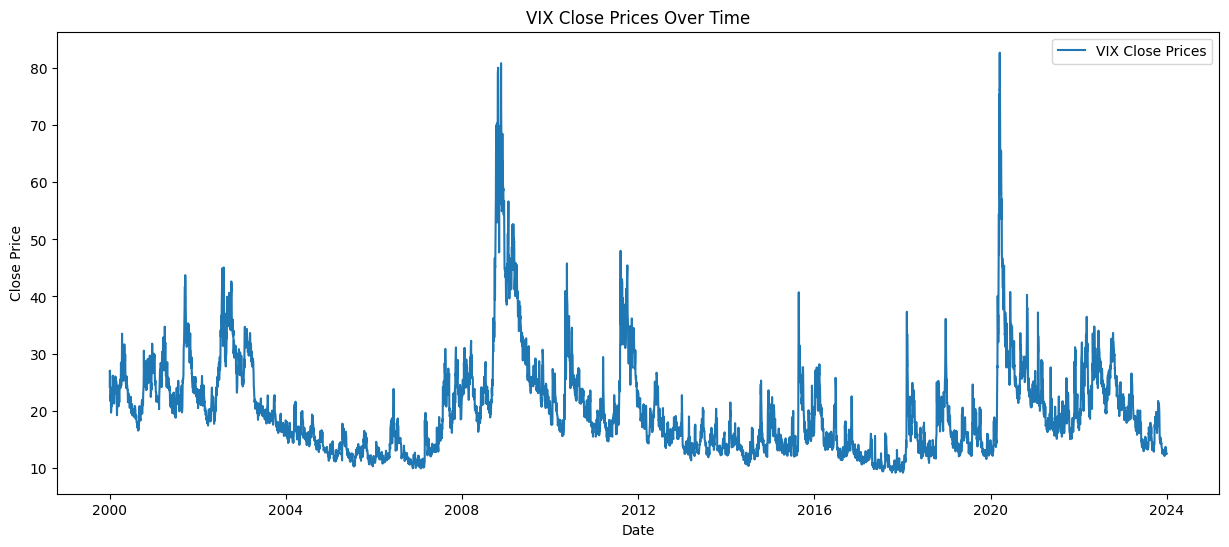

In [9]:
# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2023-12-31')

# Use 'Close' prices for modeling
vix_data = vix_data[['Close']]
vix_data.dropna(inplace=True)

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(vix_data['Close'], label='VIX Close Prices')
plt.title('VIX Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [10]:
# Augmented Dickey-Fuller Test
result = adfuller(vix_data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# If p-value > 0.05, the data is non-stationary


ADF Statistic: -5.810247495128668
p-value: 4.4186299154602657e-07
Critical Values: {'1%': -3.4314356435086664, '5%': -2.8620197550157016, '10%': -2.5670253710830897}


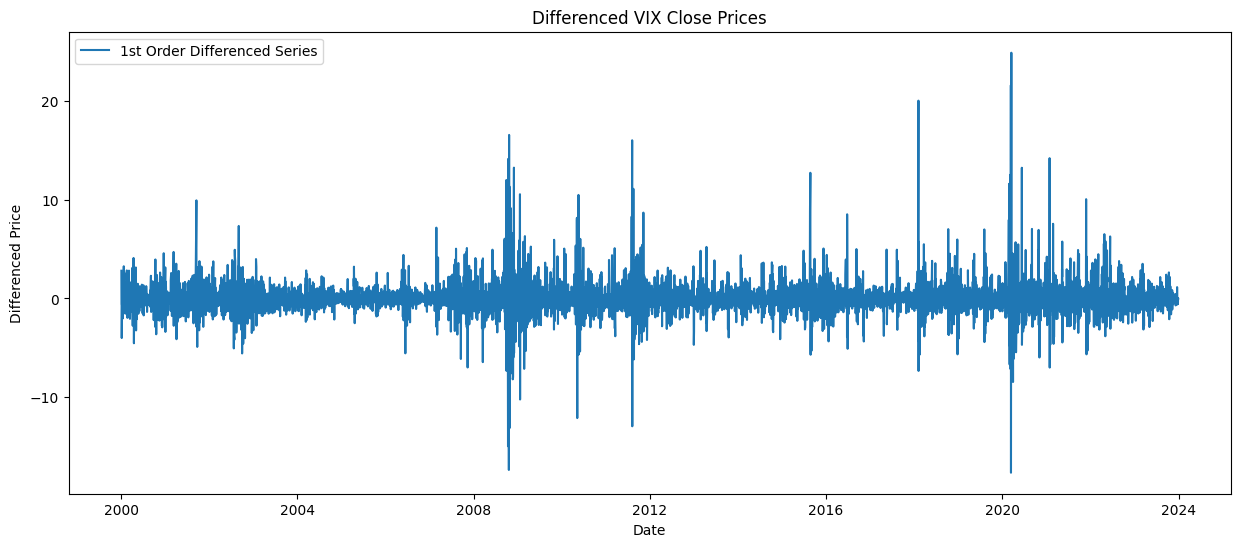

ADF Statistic after differencing: -16.083848205290955
p-value after differencing: 5.34261488032123e-29
Critical Values: {'1%': -3.431439986494406, '5%': -2.862021673865879, '10%': -2.567026392537598}


In [11]:
# First-order differencing
vix_diff = vix_data['Close'].diff().dropna()

# Plot differenced series
plt.figure(figsize=(15, 6))
plt.plot(vix_diff, label='1st Order Differenced Series')
plt.title('Differenced VIX Close Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

# Perform ADF test again to check stationarity
result = adfuller(vix_diff)
print("ADF Statistic after differencing:", result[0])
print("p-value after differencing:", result[1])
print("Critical Values:", result[4])


<Figure size 1200x600 with 0 Axes>

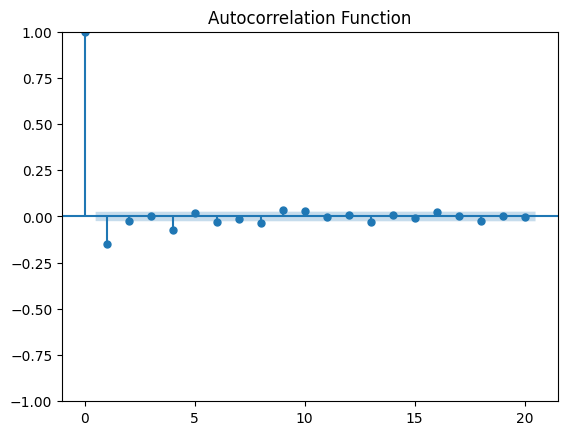

<Figure size 1200x600 with 0 Axes>

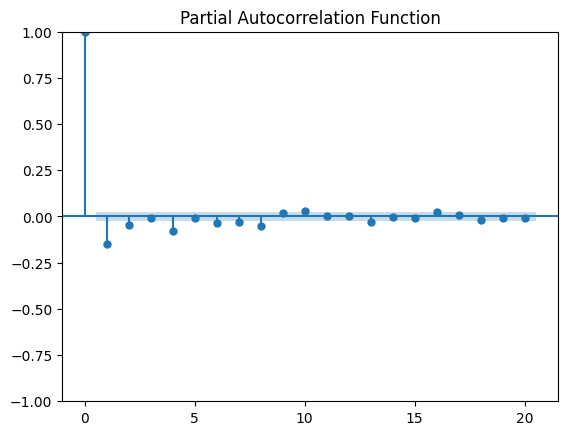

In [12]:
# ACF and PACF Plots
plt.figure(figsize=(12, 6))
plot_acf(vix_diff, lags=20, title="Autocorrelation Function")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(vix_diff, lags=20, title="Partial Autocorrelation Function")
plt.show()


In [13]:

p, d, q = 1, 0, 1

model = ARIMA(vix_data['Close'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   ^VIX   No. Observations:                 6037
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -11992.828
Date:                Fri, 15 Nov 2024   AIC                          23993.657
Time:                        20:11:32   BIC                          24020.479
Sample:                             0   HQIC                         24002.968
                               - 6037                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0508      1.670     12.006      0.000      16.777      23.324
ar.L1          0.9844      0.001    847.312      0.000       0.982       0.987
ma.L1         -0.1516      0.005    -29.300      0.0

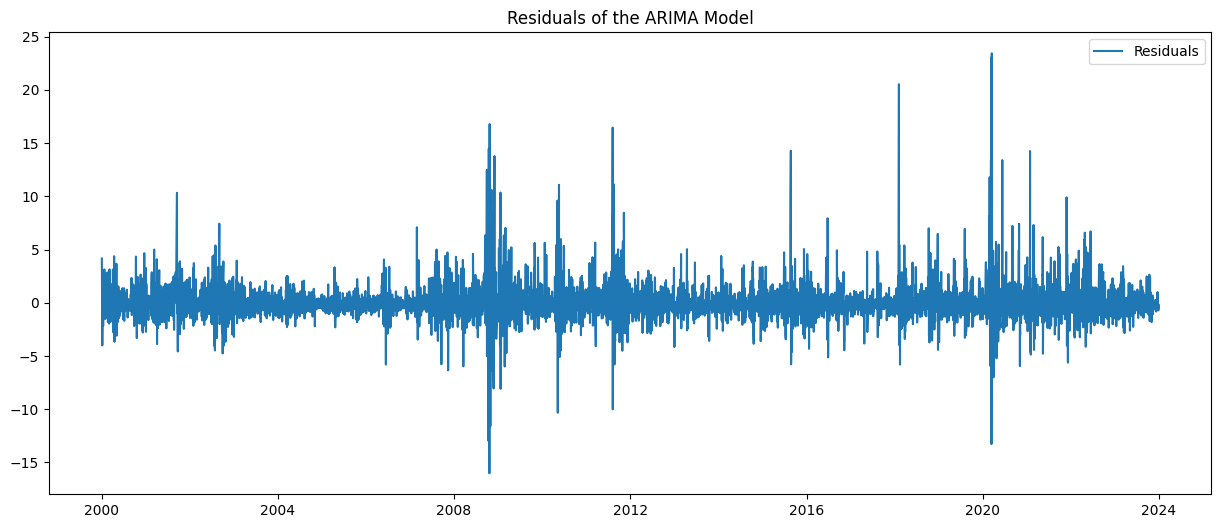

<Figure size 1200x600 with 0 Axes>

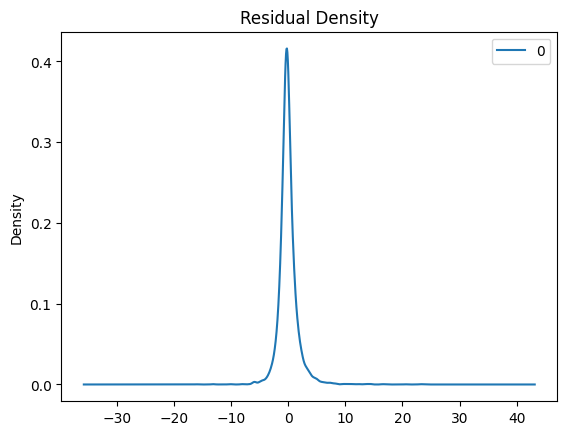

In [14]:
# Plot residuals to check for patterns
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(15, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of the ARIMA Model')
plt.legend()
plt.show()

# Check residual distribution
plt.figure(figsize=(12, 6))
residuals.plot(kind='kde', title='Residual Density')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


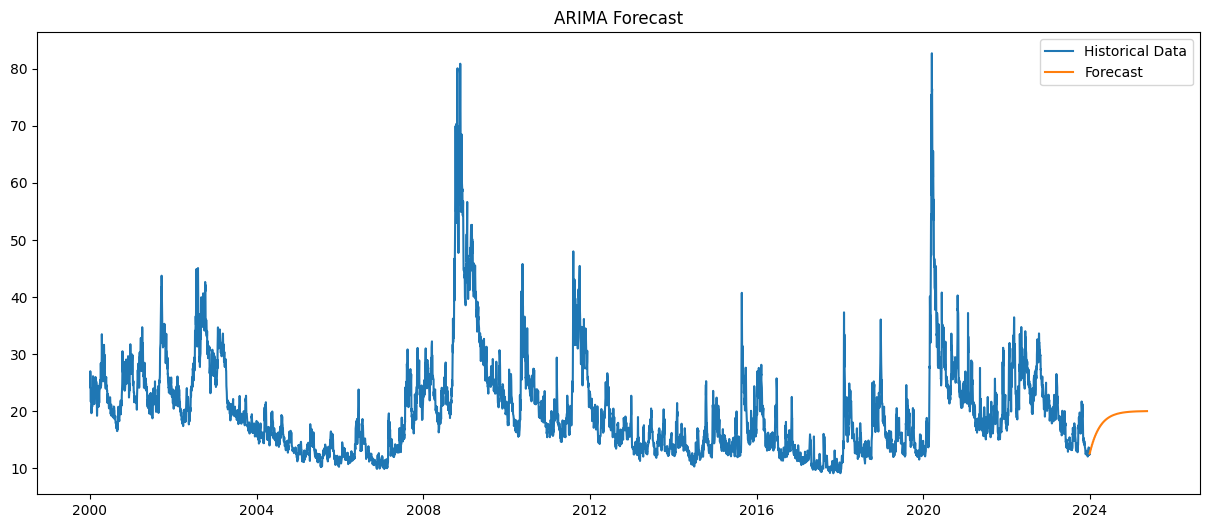

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


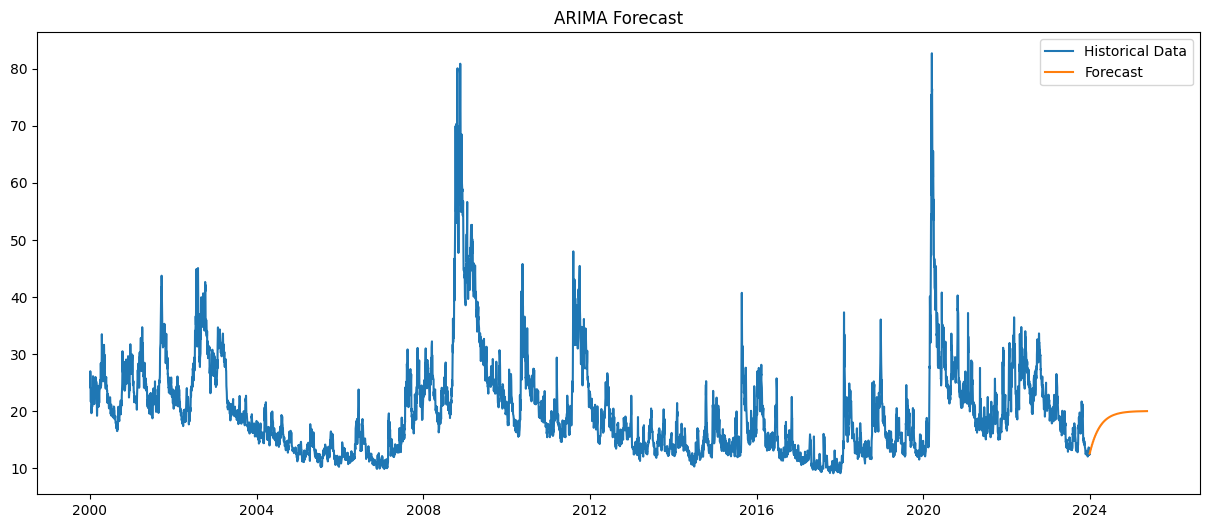

In [24]:
# Forecast future values
forecast = model_fit.forecast(steps=360)  # Forecast next 30 days

# Plot forecast
plt.figure(figsize=(15, 6))
plt.plot(vix_data['Close'], label='Historical Data')
plt.plot(pd.date_range(vix_data.index[-1], periods=360, freq='B'), forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [17]:
!pip install statsmodels --upgrade

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

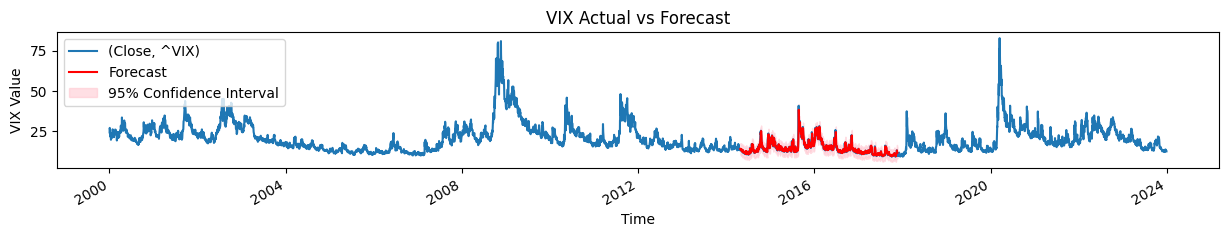

In [20]:


# Assuming 'vix_data' and 'model_fit' are already defined

# Plot Actual vs Fitted with Forecast
fig, ax = plt.subplots(figsize=(15, 2))
ax = vix_data.plot(ax=ax, label='Actual')  # Replace df with vix_data for the original series

# Get predictions (including confidence intervals)
# Adjust start and end points as needed
forecast_start = 3600  # Starting point for forecast
forecast_end = 4500   # Ending point for forecast
predictions = model_fit.get_prediction(start=forecast_start, end=forecast_end)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Plot predicted values and confidence intervals
ax.plot(predicted_mean, label='Forecast', color='red')
ax.fill_between(confidence_intervals.index,
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1],
                color='pink', alpha=0.5, label='95% Confidence Interval')

# Customize plot appearance
plt.title("VIX Actual vs Forecast")
plt.xlabel("Time")
plt.ylabel("VIX Value")
plt.legend()
plt.show()